In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

from tkinter import filedialog
from tkinter import *

In [2]:
df = pd.DataFrame.from_csv('HR_comma_sep.csv', index_col=None)

In [3]:
root = Tk()
x = filedialog.askopenfilename()
root.destroy()

In [5]:
inputed_df = pd.DataFrame.from_csv(x, index_col=None)

,id_employee,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,15000,0.17,0.73,4,188,5,0,0,0,technical,low
1,15001,0.62,0.77,3,225,4,1,0,0,technical,low
2,15002,0.32,0.40,2,132,3,0,0,0,technical,low
3,15003,0.58,0.91,5,185,2,0,0,0,support,low
4,15004,0.59,0.90,4,173,3,0,0,0,support,medium
5,15005,0.59,0.55,3,179,3,0,0,0,support,medium
6,15006,0.80,0.58,4,189,2,0,0,0,support,medium
7,15007,0.84,0.85,5,246,3,0,0,0,support,medium
8,15008,0.54,0.76,2,166,4,0,0,0,support,medium
9,15009,0.51,0.98,4,245,3,0,0,0,support,medium


In [11]:
# Renomear as colunas
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

inputed_df = inputed_df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [12]:
# Mover a coluna 'turnover' para a frente
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)

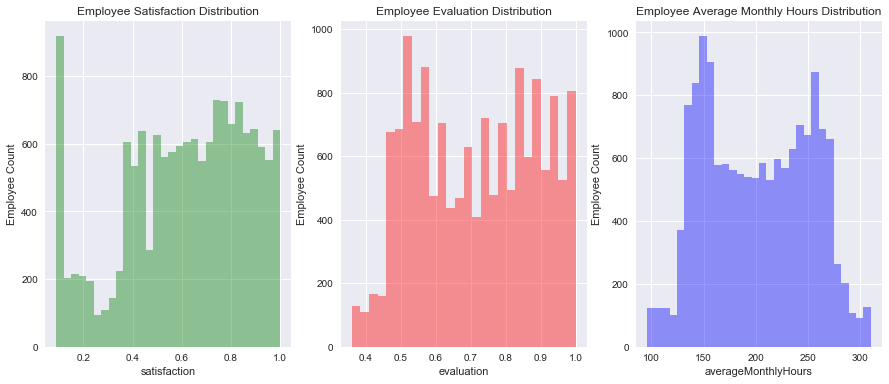

In [13]:
# começando a montar os gráficos
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Satisfação dos empregados
g1 = sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Performance dos empregados
sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Média de horas trabalhadas
sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')
plt.savefig('dashboard/distributions.png')

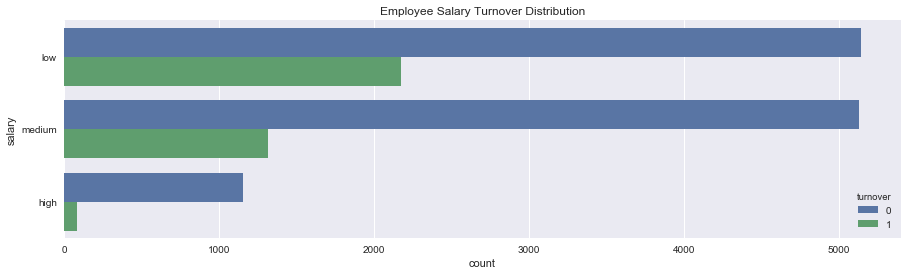

In [14]:
#Gráfico de salários e taxa de saída
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution')
plt.savefig('dashboard/turnover_salary.png')

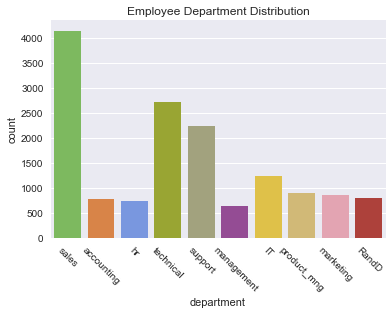

In [15]:

# Tipos de cores
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Bar plot
sns.countplot(x='department', data=df, palette=color_types).set_title('Employee Department Distribution');
 
# Rotacionar x-labels
plt.xticks(rotation=-45)
plt.savefig('dashboard/departments_distribution.png',bbox_inches='tight')

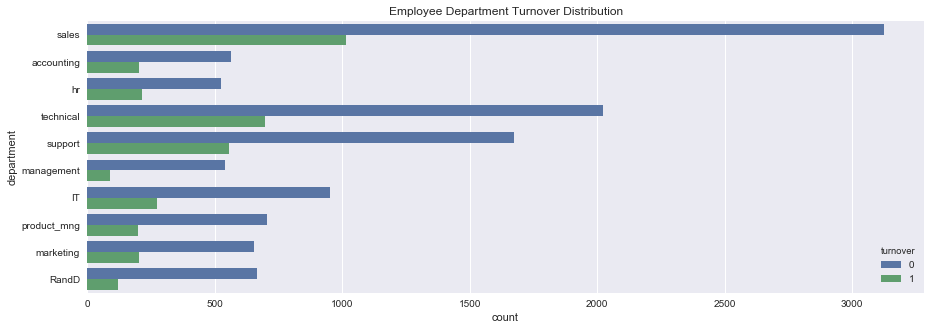

In [16]:
#gráfico de áreas com suas respectivas distribuições de saídas de funcionários
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=df).set_title('Employee Department Turnover Distribution')
plt.savefig('dashboard/departments_turnover.png')

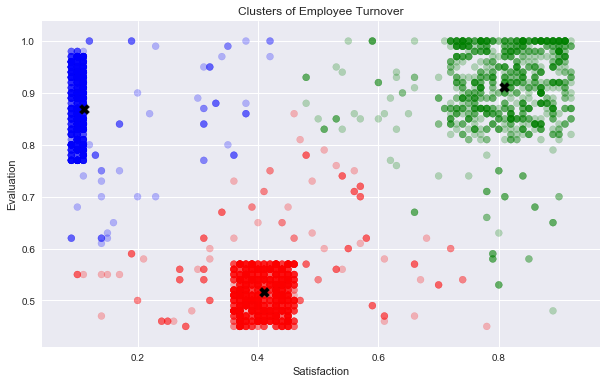

In [17]:
# Importando K-Means
from sklearn.cluster import KMeans

# criando os clusters
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.savefig('dashboard/clusters.png')

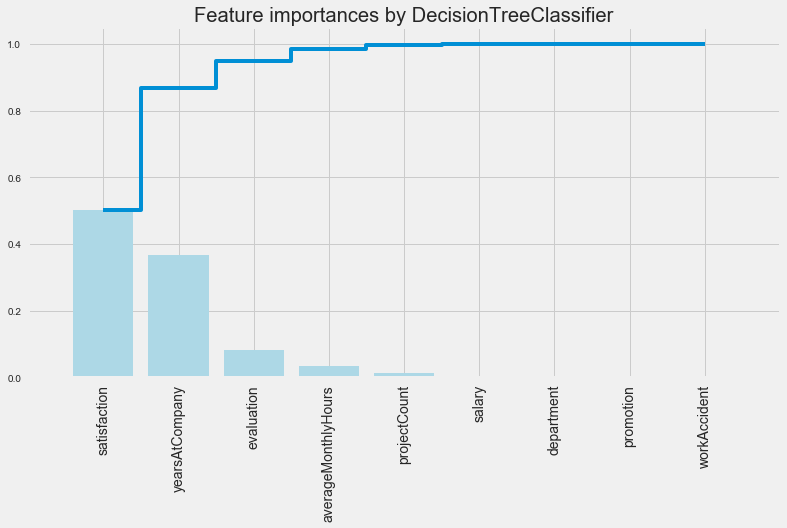

In [18]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# Renomeio de colunas
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

# Convertendo variáveis em categóricas
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

# Criando variável target
target_name = 'turnover'
X = df.drop(['turnover','id_employee'], axis=1)


y=df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=42, stratify=y)

dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plotar as variáveis mais relevantes ##
importances = dtree.feature_importances_
feat_names = df.drop(['turnover', 'id_employee'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.savefig('dashboard/most_important_features.png',bbox_inches='tight')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [20]:
# separar dataset em teste e treino
target_name = 'turnover'
X = df.drop(['turnover', 'id_employee'], axis=1)
y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=42, stratify=y)

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


In [22]:
# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
predicted = rf.predict(X_test)
rf_roc_auc = roc_auc_score(y_test, predicted)
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 0.98
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1714
          1       1.00      0.95      0.97       536

avg / total       0.99      0.99      0.99      2250



In [23]:
# Convertendo variáveis em categóricas
inputed_df["department"] = inputed_df["department"].astype('category').cat.codes
inputed_df["salary"] = inputed_df["salary"].astype('category').cat.codes

#separa o id_employee do resto
id_employee = inputed_df["id_employee"]

#cria as features do input de usuário
X_user = inputed_df.drop(['turnover', 'id_employee'], axis=1)
#cria o target do input de usuário
y_user=inputed_df[target_name]

In [24]:
predicted_user = rf.predict(X_user)

In [25]:
#transforma o array de resultados em Dataframe
predicted_user = pd.DataFrame(predicted_user)


In [26]:
result = X_user.join(predicted_user)
result = result.join(id_employee)
front_user = result['id_employee']
result.drop(labels=['id_employee'], axis=1,inplace = True)
result.insert(0, 'id_employee', front_user)
result.rename(index=str, columns={0: "turnover"}, inplace=True)
result.to_csv('resultados/resultado.csv')